### Data generation with CAMEL and finetuning with Unsloth

CAMEL and Unsloth make an excellent pair. In this notebook we will combine the two to train a model to be proficient at content on a page

You will learn how to do data generation with CAMEL, how to train, and how to run the model.
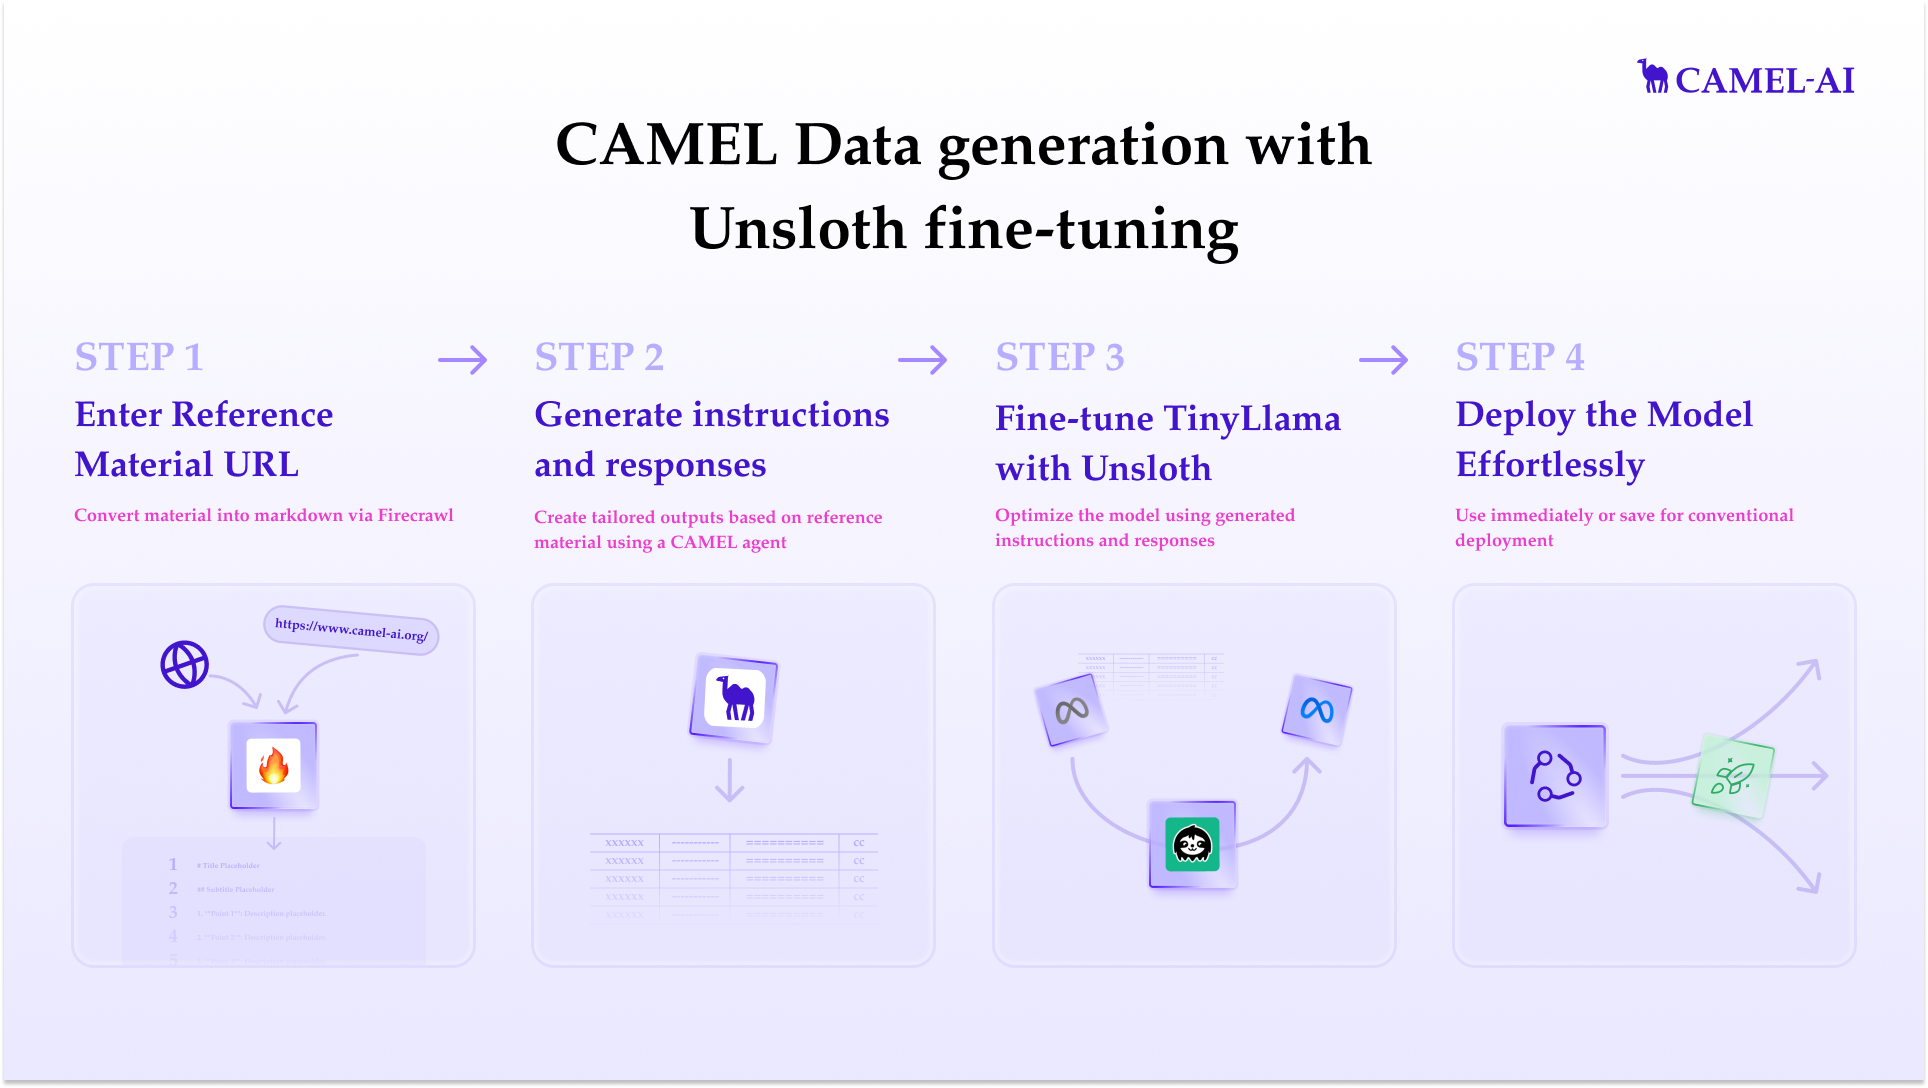

In [ ]:
%%capture
!pip install unsloth
# Install CAMEL-AI with no optional dependencies
!pip install git+https://github.com/camel-ai/camel.git@43336c9
# Get Unsloth
!pip install --upgrade --no-deps "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git@0de54572525788d09a6a9ef1efc7611e65dd7547"
!pip install firecrawl

First we will set the OPENAI_API_KEY that will be used to generate the data.

CAMEL supports many other models. See [here](https://docs.camel-ai.org/key_modules/models.html) for a list.

In [ ]:
from getpass import getpass
import os

openai_api_key = getpass('Enter your OpenAI API key: ')
os.environ["OPENAI_API_KEY"] = openai_api_key

# Generate an API key at https://www.firecrawl.dev/app/api-keys
firecrawl_api_key = getpass('Enter your Firecrawl API key: ')
os.environ["FIRECRAWL_API_KEY"] = firecrawl_api_key

Enter your OpenAI API key: ··········
Enter your Firecrawl API key: ··········


Next we will setup our model for training using Unsloth.

In [ ]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 4096
dtype = None
load_in_4bit = True

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/tinyllama-bnb-4bit", # "unsloth/tinyllama" for 16bit loading
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)
model = FastLanguageModel.get_peft_model(
    model,
    r = 32,
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",
                      "embed_tokens", "lm_head"],
    lora_alpha = 32,
    use_gradient_checkpointing = False, # @@@ IF YOU GET OUT OF MEMORY - set to True @@@
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2024.11.6: Fast Llama patching. Transformers = 4.46.2.
   \\   /|    GPU: Tesla T4. Max memory: 14.748 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.5.1+cu121. CUDA = 7.5. CUDA Toolkit = 12.1.
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.28.post3. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth: unsloth/tinyllama-bnb-4bit can only handle sequence lengths of at most 2048.
But with kaiokendev's RoPE scaling of 2.0, it can be magically be extended to 4096!


model.safetensors:   0%|          | 0.00/762M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/948 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

Unsloth 2024.11.6 patched 22 layers with 22 QKV layers, 22 O layers and 22 MLP layers.


Unsloth: Training embed_tokens in mixed precision to save VRAM
Unsloth: Training lm_head in mixed precision to save VRAM


Now as a control, lets see how this model does with our CAMEL-specific question

In [ ]:
from camel.messages.conversion import AlpacaItem

temp_model = FastLanguageModel.for_inference(model) # Enable native 2x faster inference
inputs = tokenizer(
[

   AlpacaItem(
       instruction="Explain how can I stay up to date with the CAMEL community.",
       input="",
       output="", # leave this blank for generation!
   ).to_string()

], return_tensors = "pt").to("cuda")

outputs = temp_model.generate(**inputs, max_new_tokens = 512, use_cache = True)
temp_model = None
tokenizer.batch_decode(outputs)


['<s> ### Instruction:\nExplain how can I stay up to date with the CAMEL community.\n\n### Input:\n\n\n### Response:\n\n\n## Output\n\n\n### Input\n\n\n## Response\n\n\n##\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\

Note that it hasn't been trained on this output format, so the output is total junk

### Data models
We want to generate data in the Alpaca format, so we can use CAMEL's built-in AlpacaItem class which has some handy conversion functions for us.

We will be using CAMEL's structured output to generate all of these items in one request, which is much faster and cheaper.


Here we create a wrapper around the AlpacaItem to help the model know how many have been generated as it's going along, and another wrapper class that represents a list of these.

In [ ]:
from pydantic import BaseModel

class NumberedAlpacaItem(BaseModel):
    number: int
    item: AlpacaItem


class AlpacaItemResponse(BaseModel):
    """
    Represents an instruction-response item in the Alpaca format.
    """
    items: list[NumberedAlpacaItem]

<a name="Data"></a>
### Data generation
Next we define our data generation function. It takes a source content, and generates a list of instruction-input-response triplets around it.

We will use this later to train our model to be proficient with the source content.

In [ ]:
from typing import List
from camel.loaders import Firecrawl
from camel.models import ModelFactory
from camel.types import ModelPlatformType, ModelType
from camel.configs import ChatGPTConfig
from camel.agents import ChatAgent
import json


def generate_alpaca_items(content: str, n_items: int, start_num: int = 1, examples: List[AlpacaItem] = None) -> List[AlpacaItem]:
    system_msg = """
You are an AI assistant generating detailed, accurate responses based on the provided content.
You will be given a reference content, and you must generate a specific number of AlpacaItems.
These are instruction-input-response triplets, where the input is the context or examples.

Add a number to the items to keep track of the order. Generate exactly that many.

For each instruction, imagine but do not include a real world scenario and real user in that scenario to inform realistic and varied instructions. Avoid common sense questions and answers.

Include multiple lines in the output as appropriate to provide sufficient detail. Cite the most relevant context verbatim in output fields, do not omit anything important.

Leave the input field blank.

Ensure all of the most significant parts of the context are covered.

Start with open ended instructions, then move to more specific ones. Consider the starting number for an impression of what has already been generated.
    """

    examples_str = ""
    if examples:
        examples_str = "\n\nHere are some example items for reference:\n" + \
            "\n".join(ex.model_dump_json() for ex in examples)

    model = ModelFactory.create(
        model_platform=ModelPlatformType.OPENAI,
        model_type=ModelType.GPT_4O_MINI,
        model_config_dict=ChatGPTConfig(
            temperature=0.6, response_format=AlpacaItemResponse
        ).as_dict(),
    )

    agent = ChatAgent(
        system_message=system_msg,
        model=model,
    )

    prompt = f"Content reference:\n{content}{examples_str}\n\n Generate {n_items} AlpacaItems. The first should start numbering at {start_num}."
    response = agent.step(prompt)

    # Parse the generated JSON to our wrapper class
    alpaca_items = [n_item.item for n_item in
                    AlpacaItemResponse.
                    model_validate_json(response.msgs[0].content).items]

    return alpaca_items


def save_json(data: List, filename: str):
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump([entry.model_dump() for entry in data], f, indent=2,
                  ensure_ascii=False)


# Few shot examples to ensure the right amount of detail
examples = [
    AlpacaItem(
        instruction="Explain the process for sprint planning and review in CAMEL.",
        input="",
        output="The process for sprint planning and review in CAMEL includes:\n1. **Sprint Duration**: Each sprint lasts two weeks for development and one week for review.\n2. **Planning Meeting**: Conducted biweekly, where the founder highlights the sprint goal and developers select items for the sprint.\n3. **Review Meeting**: Stakeholders review the delivered features and provide feedback on the work completed during the sprint."
    )
]



# Point to content and generate data!
Now we point to the content that we wish to generate SFT data around and use CAMEL's Firecrawl integration to get this content in a nice markdown format.

You can get a Firecrawl API key from [here](https://www.firecrawl.dev/app/api-keys)

In [ ]:
import random
firecrawl = Firecrawl()
# Scrape and clean content from a specified URL
response = firecrawl.scrape(
    url="https://github.com/camel-ai/camel/blob/master/CONTRIBUTING.md"
)

# Generate the items 50 a time up to 300
alpaca_entries = []
for start in range(1, 301, 50):
    # Combine default examples with random samples from previous generations
    current_examples = examples + (random.sample(alpaca_entries,
                                                 min(5, len(alpaca_entries)))
                                                  if alpaca_entries else [])

    batch = generate_alpaca_items(
        content=response["markdown"],
        n_items=50,
        start_num=start,
        examples=current_examples
    )
    print(f"Generated {len(batch)} items")
    alpaca_entries.extend(batch)

print(alpaca_entries)
save_json(alpaca_entries, 'alpaca_format_data.json')

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:172: UserWarning: Field name "schema" in "FirecrawlApp.ExtractParams" shadows an attribute in parent "BaseModel"
  warnings.warn(


Generated 50 items
Generated 42 items
Generated 50 items
Generated 50 items
Generated 50 items
Generated 50 items
[AlpacaItem(instruction='Summarize the guidelines for contributing to the CAMEL project.', input='', output='The guidelines for contributing to the CAMEL project include: \n- Follow the Fork-and-Pull-Request workflow for community contributors and Checkout-and-Pull-Request workflow for members of CAMEL-AI.org.\n- Ensure pull requests pass formatting, linting, and testing checks before merging.\n- If fixing a bug, add relevant unit tests; if improving, update affected examples and documentation; if adding a feature, include unit tests and demo scripts.'), AlpacaItem(instruction='Describe the communication channels available for CAMEL contributors.', input='', output='CAMEL contributors can communicate through several channels:\n- **Discord**: Join the community on Discord for discussions and updates.\n- **WeChat**: Available for Chinese speakers.\n- **Slack**: Another platfo

Now to define how each row is formatted

In [ ]:
EOS_TOKEN = tokenizer.eos_token

# Provide function showing how to convert dataset row into inference text
def formatting_prompts_func(dataset_row):
    return {
        "text": [
            AlpacaItem(instruction=inst, input=inp, output=out)
                        .to_string() + EOS_TOKEN # Use handy to_string method
            for inst, inp, out in zip(
                dataset_row["instruction"],
                dataset_row["input"],
                dataset_row["output"]
            )
        ]
    }
pass

from datasets import load_dataset
dataset = load_dataset("json", data_files="alpaca_format_data.json", split="train")
dataset = dataset.map(formatting_prompts_func, batched = True,)

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/292 [00:00<?, ? examples/s]

Train the model

In [ ]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported
trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = dataset,
    dataset_text_field = "text",
    max_seq_length = 512,
    dataset_num_proc = 2,
    packing = True, # Packs short sequences together to save time!
    args = TrainingArguments(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_ratio = 0.1,
        num_train_epochs = 40,
        learning_rate = 2e-3,
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.1,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none", # Use this for WandB etc
    ),
)
# Ensure model is fully back in training mode
model = FastLanguageModel.for_training(model)

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
dtrainer_stats = trainer.train()

Counting untrained tokens:   0%|          | 0/48 [00:00<?, ? examples/s]

Unsloth: Setting embed_tokens & lm_head untrained tokens to mean(trained) to counteract NaNs during training.


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 48 | Num Epochs = 40
O^O/ \_/ \    Batch size per device = 2 | Gradient Accumulation steps = 4
\        /    Total batch size = 8 | Total steps = 240
 "-____-"     Number of trainable parameters = 156,303,360


Step,Training Loss
1,4.124200
2,4.029200
3,4.090100
4,3.342900
5,2.615600
6,2.070200
7,1.514300
8,1.281300
9,1.174400
10,0.986300


<a name="Inference"></a>
### Inference
Let's run the model! You can change the instruction and input - leave the output blank!

In [ ]:
FastLanguageModel.for_inference(model) # Enable native 2x faster inference
inputs = tokenizer(
[

    AlpacaItem(
        instruction="Explain how can I stay up to date with the CAMEL community.",
        input="",
        output="", # leave this blank for generation!
    ).to_string()

], return_tensors = "pt").to("cuda")

outputs = model.generate(**inputs, max_new_tokens = 512, use_cache = True)
tokenizer.batch_decode(outputs)

['<s> ### Instruction:\nExplain how can I stay up to date with the CAMEL community.\n\n### Input:\n\n\n### Response:\nTo can update with the CAMEL community, contributors should:\n1. Join the community on Discord by mentioning their Twitter account.\n2. Participate in scheduled introduction calls for English or Chinese speakers.\n3. Attend developer meetings held weekly.</s>']

**Summary**


We have generated realistic user queries and responses from a real page and trained on them to produce a model that understands the underlying content.